In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

In [2]:
data_folder = "../data/"

figures_folder = "../Figures/"

sif_output = "../sif_files/"

In [3]:
Huri = pd.read_csv('../data/HURI_full_data_trasnlated.csv', usecols=["source_UniProtKB-Swiss-Prot", "target_UniProtKB-Swiss-Prot"])

In [4]:
Huri

,source_UniProtKB-Swiss-Prot,target_UniProtKB-Swiss-Prot
0,Q9H2S6,Q9NPE6
1,Q9H2S6,Q9BXK5
2,Q9H2S6,O60238
3,Q9H2S6,P20138
4,Q9H2S6,Q9UM44
...,...,...
75885,O14737,Q92993
75886,P04792,O43707
75887,P04792,Q9NPF5
75888,P31749,Q12778


In [5]:
resources = Resources()

In [7]:
mapping = {"source_UniProtKB-Swiss-Prot": "source", "target_UniProtKB-Swiss-Prot": "target"}
resources.add_database(Huri, column_mapping=mapping,  reset_index=True)

In [8]:
wnt_list = ['CTNNB1',
 'APC',
 'CSNK2B',
 'ARID1A',
 'ARID2',
 'ATM',
 'PIK3CA',
 'BAI3',
 'EPHA7',
 'DDX3X',
 'SYNCRIP',
 'ALX4',
 'DLX3',
 'DLX4',
 'EMX2',
 'EN1',
 'FOXF1',
 'HOMEZ',
 'HOXC4',
 'HOXC5',
 'HOXD11',
 'HOXD13',
 'HOXD8',
 'HOXD9',
 'IRX2',
 'IRX5',
 'LEF1',
 'LHX8',
 'MAF',
 'MSX2',
 'NKX6-1',
 'ONECUT2',
 'OSR2',
 'PAX3',
 'PITX1',
 'PRRX1',
 'RUNX2',
 'SHOX2']

In [9]:
wnt_net = Network(wnt_list, resources = resources.interactions)

Error: node ARID2 is not present in the resources database
Error: node EPHA7 is not present in the resources database
Error: node DLX4 is not present in the resources database
Error: node EN1 is not present in the resources database
Error: node FOXF1 is not present in the resources database
Error: node HOMEZ is not present in the resources database
Error: node HOXD11 is not present in the resources database
Error: node HOXD13 is not present in the resources database
Error: node HOXD9 is not present in the resources database
Error: node IRX5 is not present in the resources database
Error: node NKX6-1 is not present in the resources database
Error: node ONECUT2 is not present in the resources database
Error: node SHOX2 is not present in the resources database


In [10]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,CTNNB1,P35222,NaN
1,APC,P25054,NaN
2,CSNK2B,P67870,NaN
3,ARID1A,O14497,NaN
4,ATM,Q13315,NaN
5,PIK3CA,P42336,NaN
6,ADGRB3,O60242,NaN
7,DDX3X,O00571,NaN
8,SYNCRIP,O60506,NaN
9,ALX4,Q9H161,NaN


In [11]:
%%time
wnt_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=False, connect_with_bias=False, consensus=False)

CPU times: user 11.1 s, sys: 5.95 ms, total: 11.1 s
Wall time: 11.1 s


In [12]:
wnt_net.edges

,source,target,Type,Effect,References
0,P25054,P35222,None,undefined,;
1,O14497,P51532,None,undefined,;
2,P51532,P35222,None,undefined,;
3,P42336,P27986,None,undefined,;
4,P27986,P35222,None,undefined,;
...,...,...,...,...,...
255,Q9HC52,Q8WWB5,None,undefined,
256,Q92569,P00533,None,undefined,
257,P02751,P00533,None,undefined,
258,P02751,P12956,None,undefined,


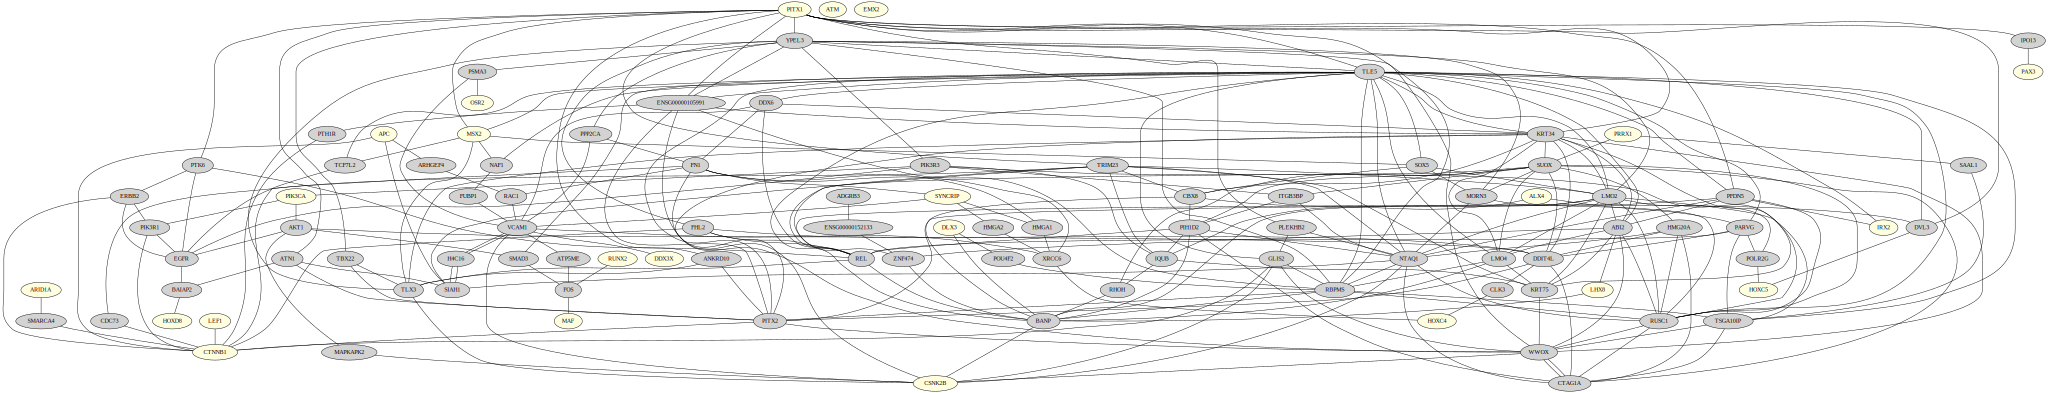

In [13]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_HURI"
wnt_visualizer.render(output_file=output)

In [14]:
from neko._outputs.exports import Exports

In [15]:
export = Exports(wnt_net)

In [16]:
folder = sif_output + "WNT_HURI.sif"

In [17]:
export.export_sif(folder)